# In this program , I will use machine learning algorithms to predict digits from a given dataset of images.


In [1]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
digits=load_digits()
digits.images.shape

(1797, 8, 8)

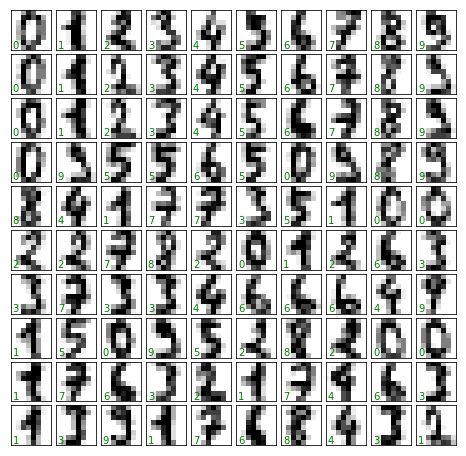

In [3]:
#subplotting the plot in a 10x10 section
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
#adjusting the height and width of the subplot
fig.subplots_adjust(hspace=0.1, wspace=0.1)
#loop to plot the images along with their values
for i, ax in enumerate(axes.flat):
    #to print the i-th image in the digit dataset
    ax.imshow(digits.images[i], cmap='binary')
    #to print the number the image represent
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes,
            color='green')
    ax.set_xticks([])
    ax.set_yticks([])
plt.imshow(digits.images[12],cmap='binary')


In [4]:
#each images is itself a matrix of numbers that make up the corresponding image.Lets look at one
print (digits.images[0])
#observing the matrix, we can see that the 8x8 matrix has arrangement of numbers in a form to represnt digit 0

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [5]:
print digits.target[0]
#the image was classified as 0 in the dataset

0


In [6]:
#lets look for some other image structures too

In [7]:
#matrix representation of '2'
print(digits.images[3])
print(digits.target[3])

[[  0.   0.   7.  15.  13.   1.   0.   0.]
 [  0.   8.  13.   6.  15.   4.   0.   0.]
 [  0.   2.   1.  13.  13.   0.   0.   0.]
 [  0.   0.   2.  15.  11.   1.   0.   0.]
 [  0.   0.   0.   1.  12.  12.   1.   0.]
 [  0.   0.   0.   0.   1.  10.   8.   0.]
 [  0.   0.   8.   4.   5.  14.   9.   0.]
 [  0.   0.   7.  13.  13.   9.   0.   0.]]
3


In [8]:
print digits.data.shape

(1797, 64)


So, our dataset has got 1797 image examples each represented in an 8x8 matrix , this makes up a 64 dimension dataset! 

# Unsupervised Learning:Dimensionality Reduction

Since we have got a 64 dimensional dataset, we need to reduce its dimensions to a level where we can visualize the datasets. Because a 64 dimensional plotting is impossible!

In [9]:
from sklearn.manifold import Isomap

n_component value 2 shows that we will be reducing the 64 dimesional dataset to 2 dimension!
in order to learn about different attribute meaning of Isomap, you can call for this magical code "Isomap?"

In [10]:
iso=Isomap(n_components=2)

In [11]:
data_projected=iso.fit_transform(digits.data)
data_projected.shape

(1797, 2)

# plotting the reduced dataset for a quick visualization

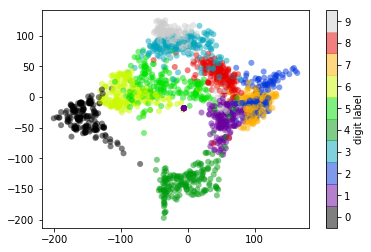

In [12]:
plt.scatter(data_projected[:,0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label',ticks=range(10));
plt.clim(-0.5,9.5);

# classification on dataset

Having done with the digit visualization, we now move to describing a machine learning model that can predict the digit based on
its corresponding data matrix.

In [13]:
#splitting the dataset into training and testing data
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=2)
print X_train.shape, X_test.shape

(1347, 64) (450, 64)


We will now use Logistic Regression model to predict the digit.

In [14]:
from sklearn.linear_model import LogisticRegression

#since we need to 'calculate' the digit on the basis of given data matrix we use Regression

lr=LogisticRegression()

lr.fit(X_train,y_train)
#fitting the data to the ML algorithm to train the model. We use the X_train( training case) that we split above from the dataset

y_pred=lr.predict(X_test)
#prediction of digit using a testing case


To learn about the accuracy of our model , lets generate the accuracy score

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.94666666666666666

94% accuracy is a sign of good model !

lets see where we got the wrong calculation! this can be done using a confusion matrix

In [16]:
confusion_matrix(y_test,y_pred)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  2,  0,  3,  1,  0],
       [ 0,  2,  0,  0, 36,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  2, 34]])

/Users/lalit_gupta/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


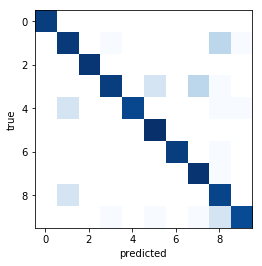

In [17]:
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap='Blues',interpolation='nearest');
plt.grid(False)
plt.xlabel('predicted')
plt.ylabel('true');

# printing the output of the model with the respective images

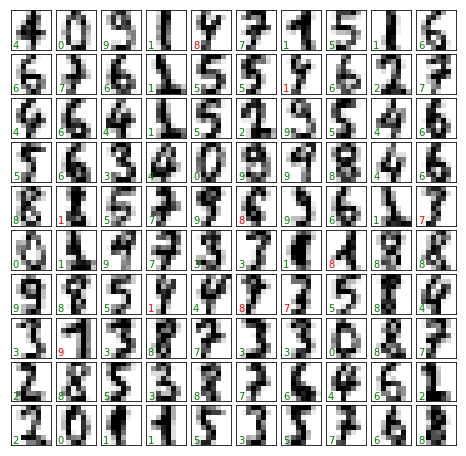

In [18]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(y_pred[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_pred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])